Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


Column Profiling:

data - tells whether the data is testing or training data
trip_creation_time – Timestamp of trip creation
route_schedule_uuid – Unique Id for a particular route schedule
route_type – Transportation type
FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
Carting: Handling system consisting of small vehicles (carts)
trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
source_center - Source ID of trip origin
source_name - Source Name of trip origin
destination_cente – Destination ID
destination_name – Destination Name
od_start_time – Trip start time
od_end_time – Trip end time
start_scan_to_end_scan – Time taken to deliver from source to destination
is_cutoff – Unknown field
cutoff_factor – Unknown field
cutoff_timestamp – Unknown field
actual_distance_to_destination – Distance in Kms between source and destination warehouse
actual_time – Actual time taken to complete the delivery (Cumulative)
osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
factor – Unknown field
segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
segment_factor – Unknown field



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Basic data cleaning and exploration:
    Handle missing values in the data.
    Analyze the structure of the data.
    Try merging the rows using the hint mentioned above.

In [2]:
df=pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
#Making sure that there are no negative time/distance values
num_columns_=['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
'osrm_distance', 'segment_actual_time', 'segment_osrm_distance',
'segment_osrm_time']
df[num_columns_]=np.abs(df[num_columns_])



In [5]:
#converting the datetime columns to datetime data type
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [6]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.208246,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,0.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.562957,14.775960,17.86066,4.847530


In [7]:
df.isnull().sum()
# we can see that there are null values in source_name and destination_name

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [8]:
#dropping the null values
df=df.dropna(how='any')
df.reset_index(inplace=True)

In [9]:
df.shape

(144316, 25)

In [10]:
#checking the cycle of one sample trip_id
df[df['trip_uuid']=='trip-153741093647649320']

,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [11]:
#grouping by trip_id, source_id and destination_id

df['segment_key']=df['trip_uuid']+df['source_center']+df['destination_center']

segment_cols=['segment_actual_time'  ,               
'segment_osrm_time' ,                 
'segment_osrm_distance' ]

for col in segment_cols:
    df[col+'_sum']=df.groupby('segment_key')[col].cumsum()
    
df[df['trip_uuid']=='trip-153741093647649320']

,index,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.0,11.9653
1,1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,20.0,21.7243
2,2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,27.0,32.5395
3,3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,39.0,45.5619
4,4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,44.0,49.4772
5,5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320IND388620AABIND388320AAA,15.0,11.0,12.1171
6,6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320IND388620AABIND388320AAA,43.0,17.0,21.2890
7,7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,35.8252,2.241379,21.0,11.0,14.5362,1.909091,trip-153741093647649320IND388620AABIND388320AAA,64.0,28.0,35.8252
8,8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,47.1900,1.948718,10.0,10.0,11.3648,1.000000,trip-153741093647649320IND388620AABIND388320AAA,74.0,38.0,47.1900
9,9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),...,53.2334,2.266667,26.0,6.0,6.0434,4.333333,trip-153741093647649320IND388620AABIND388320AAA,100.0,44.0,53.2334


In [12]:
#creating a dictionary to specify the type of aggregation for each column
create_dict={'data':'first'     ,         
'trip_creation_time':'first'    ,              
'route_schedule_uuid' : 'first'  ,                
'route_type':'first' ,                          
'trip_uuid':'first' ,                           
'source_center' :'first' ,                      
'source_name' :'first' ,                       
'destination_center' : 'first' ,                  
'destination_name'     :'first' ,             
'od_start_time':'first' ,                      
'od_end_time' :'first' ,                        
'start_scan_to_end_scan'  : 'first' ,                             
'actual_distance_to_destination':'last'    ,  
'actual_time' :'last'    ,                       
'osrm_time' : 'last'    ,                          
'osrm_distance' : 'last'    ,                                                  
'segment_actual_time_sum' :'last'    ,                 
'segment_osrm_time_sum' :'last'    ,                   
'segment_osrm_distance_sum' :'last'                   
}

In [13]:
#grouping by the data at trip_id, source,destination level

df_1= df.groupby('segment_key').agg(create_dict).reset_index()
df_1=df_1.sort_values(by=['segment_key','od_end_time'])
df_1

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [14]:
#checking the cycle of sample trip_id
# as we can see , we now have two rows for one trip_id.

df_1[df_1['trip_uuid']=='trip-153741093647649320']

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [16]:
df_1['od_time_diff_hour']=(df_1['od_end_time']-df_1['od_start_time']).dt.total_seconds()/60
df_1['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [17]:
create_dict_2={'data':'first'     ,         
'trip_creation_time':'first'    ,              
'route_schedule_uuid' : 'first'  ,                
'route_type':'first' ,                                                    
'source_center' :'first' ,                      
'source_name' :'first' ,                       
'destination_center' : 'last' ,                  
'destination_name'     :'last' ,             
'od_time_diff_hour':'sum',                      
'start_scan_to_end_scan'  : 'sum' ,                             
'actual_distance_to_destination':'sum'    ,  
'actual_time' :'sum'    ,                       
'osrm_time' : 'sum'    ,                          
'osrm_distance' : 'sum'    ,                                                  
'segment_actual_time_sum' :'sum'    ,                 
'segment_osrm_time_sum' :'sum'    ,                   
'segment_osrm_distance_sum' :'sum'                   
}

In [18]:
#grouping by to convert the data having just one row for every trip id
df_2= df_1.groupby('trip_uuid').agg(create_dict_2).reset_index()
df_2[df_2['trip_uuid']=='trip-153741093647649320']

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5917,trip-153741093647649320,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.386819,195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


In [19]:
# we have reduced the data to just what is relevant
df_2.shape

(14787, 18)

In [20]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_2['osrm_distance'], df_2['actual_distance_to_destination'])

if p_value<0.05:
    print(p_value,'We are able to reject the null hypothesis. osrm_distance and actual_distance_to_destination are two different sample groups and there is a significant difference between them')
else:
    print(p_value,"We aren't able to reject the null hypothesis.There isn't a very big difference between osrm_distance and actual_distance_to_destination")

7.65905658899532e-24 We are able to reject the null hypothesis. osrm_distance and actual_distance_to_destination are two different sample groups and there is a significant difference between them


Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)


In [21]:
# H0= They are same
# HA= They are different

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_2['actual_time'], df_2['osrm_time'])

if p_value<0.05:
    print(p_value,'We are able to reject the null hypothesis. Actual time and OSRM time are two different sample groups and there is a significant difference between them')
else:
    print(p_value,"We aren't able to reject the null hypothesis.There isn't a very big difference between actual time and OSRM time")

8.2146191343466e-310 We are able to reject the null hypothesis. Actual time and OSRM time are two different sample groups and there is a significant difference between them


Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [22]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_2['actual_time'], df_2['segment_actual_time_sum'])

if p_value<0.05:
    print(p_value,'We are able to reject the null hypothesis. Actual time and segment_actual_time are two different sample groups and there is a significant difference between them')
else:
    print(p_value,"We aren't able to reject the null hypothesis.There isn't a very big difference between actual time and segment_actual_time")

0.6304365404194694 We aren't able to reject the null hypothesis.There isn't a very big difference between actual time and segment_actual_time


Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [23]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_2['osrm_distance'], df_2['segment_osrm_distance_sum'])

if p_value<0.05:
    print(p_value,'We are able to reject the null hypothesis. osrm_distance and segment_osrm_distance are two different sample groups and there is a significant difference between them')
else:
    print(p_value,"We aren't able to reject the null hypothesis.There isn't a very big difference between osrm_distance and segment_osrm_distance")

4.0929578191203324e-05 We are able to reject the null hypothesis. osrm_distance and segment_osrm_distance are two different sample groups and there is a significant difference between them


Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [24]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_2['osrm_time'], df_2['segment_osrm_time_sum'])

if p_value<0.05:
    print(p_value,'We are able to reject the null hypothesis. osrm_time and segment_osrm_time are two different sample groups and there is a significant difference between them')
else:
    print(p_value,"We aren't able to reject the null hypothesis.There isn't a very big difference between osrm_time and segment_osrm_time")

1.128703468644937e-08 We are able to reject the null hypothesis. osrm_time and segment_osrm_time are two different sample groups and there is a significant difference between them


Build some features to prepare the data for actual analysis. Extract features from the below fields:
Destination Name: Split and extract features out of destination. City-place-code (State)
Source Name: Split and extract features out of destination. City-place-code (State)
Trip_creation_time: Extract features like month, year and day etc

In [25]:
df_2['destination_name']=df_2['destination_name'].str.lower()
df_2['source_name']=df_2['source_name'].str.lower()

In [26]:
#Extracting more location features out of the source and destinations

def place2state(x):
    return x.split('(')[1][:-1]

def place2city(x):
    city=x.split('(')[0].split('_')[0]
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'
    
    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'
    
    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'
    
    return city

def place2place(x):
    
    x = x.split(' (')[0]
    
    len_ = len(x.split('_'))
    
    if len_ >= 3:
        return x.split('_')[1]
    
    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]
    
    
    # Now we need to deal with edge cases or imporper name convention 
    
    #if len(x.split(' ')) == 2:
    #    
    
    return x.split(' ')[0]

def place2code(x):
    x = x.split(' (')[0]
    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]
    
    return 'none'
    
    
    

In [27]:
df_2['destination_state'] = df_2['destination_name'].apply(lambda x: place2state(x)) 
df_2['destination_city']  = df_2['destination_name'].apply(lambda x: place2city(x)) 
df_2['destination_place'] = df_2['destination_name'].apply(lambda x: place2place(x)) 
df_2['destination_code']  = df_2['destination_name'].apply(lambda x: place2code(x)) 
df_2['source_state'] = df_2['source_name'].apply(lambda x: place2state(x)) 
df_2['source_city']  = df_2['source_name'].apply(lambda x: place2city(x)) 
df_2['source_place'] = df_2['source_name'].apply(lambda x: place2place(x)) 
df_2['source_code']  = df_2['source_name'].apply(lambda x: place2code(x)) 
df_2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,segment_osrm_time_sum,segment_osrm_distance_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2260.109800,...,1008.0,1320.4733,uttar pradesh,kanpur,central,6,uttar pradesh,kanpur,central,6
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,...,65.0,84.1894,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3934.362520,...,1941.0,2545.2678,haryana,gurgaon,bilaspur,hb,haryana,gurgaon,bilaspur,hb
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,...,16.0,19.8766,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,...,115.0,146.7919,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none


In [28]:


df_2['trip_year'] = df_2['trip_creation_time'].dt.year
df_2['trip_month'] = df_2['trip_creation_time'].dt.month
df_2['trip_hour'] = df_2['trip_creation_time'].dt.hour
df_2['trip_day'] = df_2['trip_creation_time'].dt.day
df_2['trip_week'] = df_2['trip_creation_time'].dt.isocalendar().week
df_2['trip_dayofweek'] = df_2['trip_creation_time'].dt.dayofweek
df_2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2260.109800,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3934.362520,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,...,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2


In [29]:
num_columns=['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
'segment_osrm_time_sum', 'od_time_diff_hour']



for i in num_columns:
    print(i,':',np.average(df_2[i]))



start_scan_to_end_scan : 529.4290254953676
actual_distance_to_destination : 164.0901961720598
actual_time : 356.30601203760057
osrm_time : 160.99093798606884
osrm_distance : 203.88741124636508
segment_actual_time_sum : 353.17806181105027
segment_osrm_distance_sum : 222.7054664434977
segment_osrm_time_sum : 180.5115980252925
od_time_diff_hour : 530.3135170742601


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'uttar pradesh'),
  Text(1, 0, 'karnataka'),
  Text(2, 0, 'haryana'),
  Text(3, 0, 'maharashtra'),
  Text(4, 0, 'tamil nadu'),
  Text(5, 0, 'gujarat'),
  Text(6, 0, 'delhi'),
  Text(7, 0, 'telangana'),
  Text(8, 0, 'rajasthan'),
  Text(9, 0, 'madhya pradesh'),
  Text(10, 0, 'assam'),
  Text(11, 0, 'west bengal'),
  Text(12, 0, 'andhra pradesh'),
  Text(13, 0, 'punjab'),
  Text(14, 0, 'chandigarh'),
  Text(15, 0, 'dadra and nagar haveli'),
  Text(16, 0, 'orissa'),
  Text(17, 0, 'bihar'),
  Text(18, 0, 'jharkhand'),
  Text(19, 0, 'goa'),
  Text(20, 0, 'uttarakhand'),
  Text(21, 0, 'himachal pradesh'),
  Text(22, 0, 'kerala'),
  Text(23, 0, 'arunachal pradesh'),
  Text(24, 0, 'mizoram'),
  Text(25, 0, 'chhattisgarh'),
  Text(26, 0, 'jammu & kashmir'),
  Text(27, 0, 'nagaland'),
  Text(28, 0, 'meghalaya'),
  Text(29, 0, 'tripura'),
  Tex

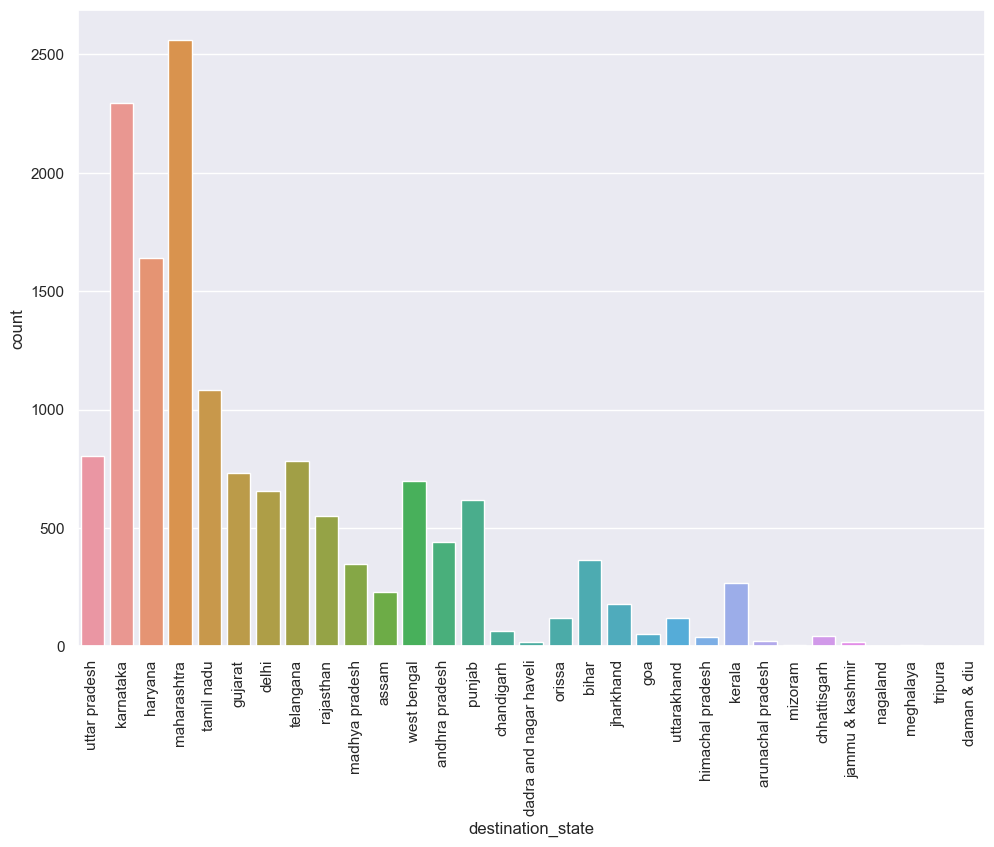

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df_2['destination_state'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

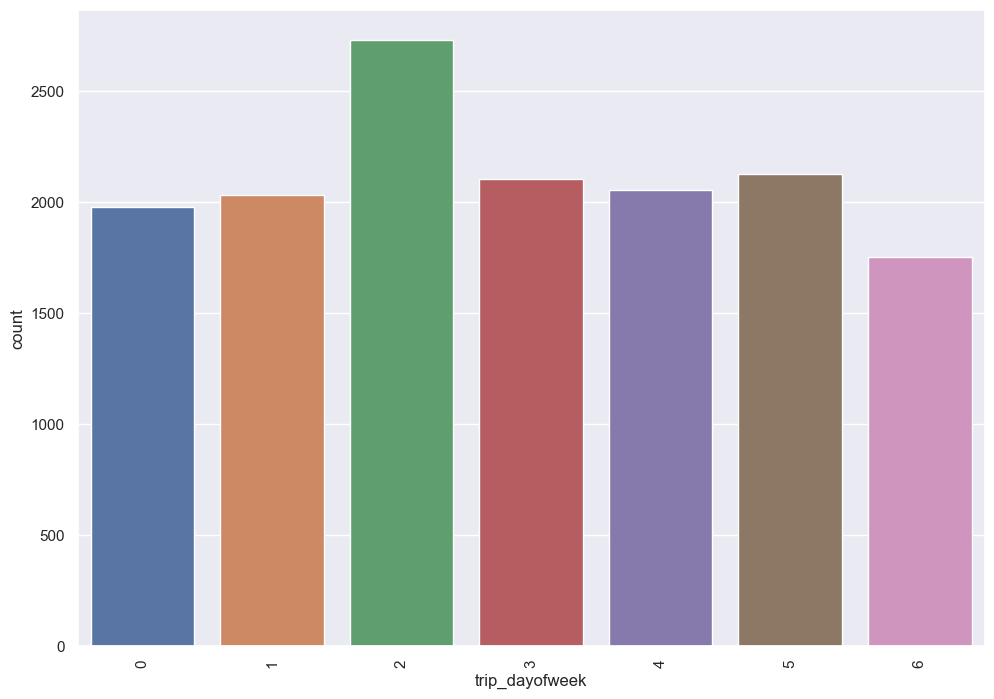

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df_2['trip_dayofweek'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '9'), Text(1, 0, '10')])

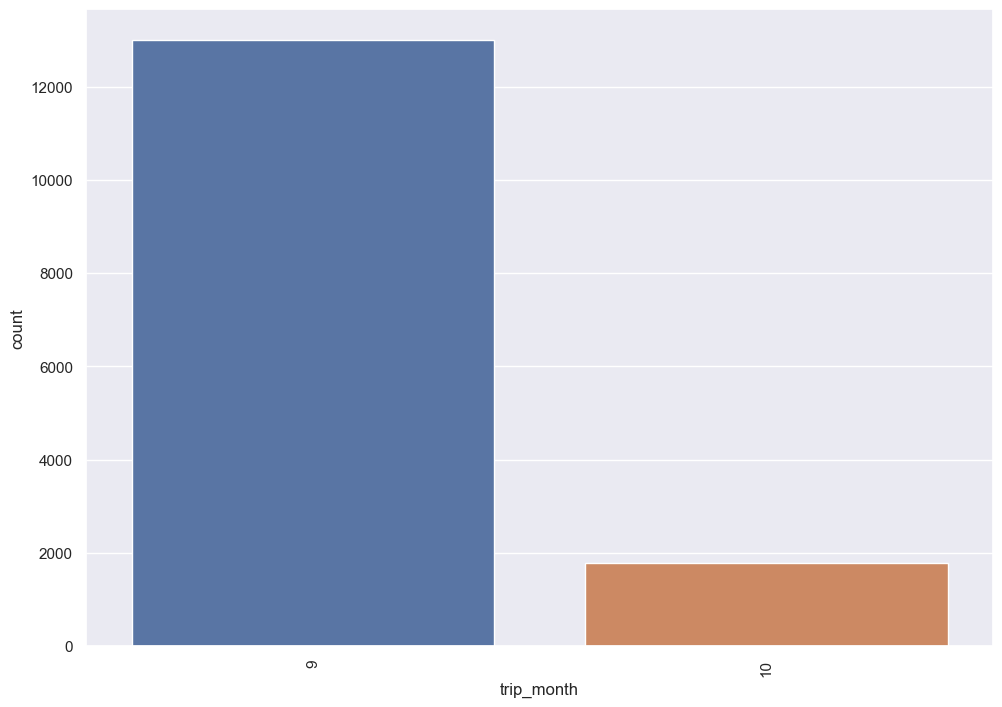

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df_2['trip_month'])
plt.xticks(rotation=90)

In [33]:
df_2['trip_month'].value_counts(normalize=True)

trip_month
9     0.879895
10    0.120105
Name: proportion, dtype: float64

Handle the outliers using the IQR method.

In [34]:
Q1=df_2[num_columns].quantile(0.25)
Q3=df_2[num_columns].quantile(0.75)

IQR=Q3-Q1

df_2=df_2.loc[((df_2[num_columns] >= (Q1 - 1.5 * IQR)) & (df_2[num_columns] <= (Q3 + 1.5 * IQR))).any(axis=1)]

Do one-hot encoding of categorical variables (like route_type)

In [35]:
df_2=pd.concat([df_2,pd.get_dummies(df_2.route_type,dtype=int)],axis=1)
df_2.drop(columns='route_type',axis=1,inplace=True)
df_2.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,...,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,Carting,FTL
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),181.611874,180.0,...,chikadpp,d,2018,9,0,12,37,2,1,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.494935,100.0,...,mumbai,none,2018,9,0,12,37,2,1,0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),718.349042,717.0,...,bellary,none,2018,9,0,12,37,2,0,1
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),190.487849,189.0,...,chennai,none,2018,9,0,12,37,2,1,0
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.005634,98.0,...,chrompet,dpc,2018,9,0,12,37,2,1,0


Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_2[num_columns])
df_2[num_columns]=scaler.transform(df_2[num_columns])
df_2[num_columns]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1,-0.583205,-0.176567,-0.349104,-0.285954,-0.238664,-0.351331,-0.286111,-0.363861,-0.580660
3,-0.806437,-0.702152,-0.681501,-0.789606,-0.728106,-0.677479,-0.735168,-0.779831,-0.806809
4,0.915235,0.332597,0.434403,0.179686,0.222725,0.440175,0.151004,0.060599,0.915728
5,-0.558092,-0.632510,-0.673587,-0.713583,-0.665386,-0.673502,-0.677995,-0.720406,-0.555914
6,-0.812017,-0.777922,-0.820000,-0.808612,-0.785417,-0.816689,-0.790037,-0.805298,-0.813749
...,...,...,...,...,...,...,...,...,...
14782,-0.368345,-0.321303,-0.586531,-0.342971,-0.325795,-0.585999,-0.421110,-0.389328,-0.367614
14783,-0.918052,-0.717743,-0.831872,-0.818115,-0.754974,-0.828621,-0.761619,-0.822277,-0.918060
14784,0.089279,-0.500317,0.200934,-0.476012,-0.434702,0.205507,-0.141595,-0.168609,0.089861
14785,-0.117210,0.400865,0.129706,0.768864,0.404634,0.114027,0.686836,0.960452,-0.115351


Analysis and recommendations->
1. Majority of the deliveries happened in the month of September ~88%
2. Average actual_distance_to_destination : 164.0901961720598
3. Average actual_time : 356.30601203760057 (hours)
4. The top 3 states in the count of deliveries are-> Maharashtra, Karnataka and Haryana. We should be focusing on expanding our business here.
5. The maximum count of deliveries are happening on Tuesday.
6. Actual time and OSRM time have significant difference between them. Hence, we should be focusing on improving the OSRM time prediction.Also, we should be focusing on improving the operations section where we are logging in the time to make sure that we are very logging accurate time in the system.
7. osrm_distance and segment_osrm_distance have significant difference between them. We should be focusing on improving the segment_osrm_distance prediction to match the osrm_distance prediction.
8. osrm_time and segment_osrm_time are two different sample groups and there is a significant difference between them. We should be focusing on improving the segment_osrm_time prediction to match the osrm_time prediction. 
9. osrm_distance and actual_distance_to_destination are two different sample groups and there is a significant difference between them.Also, we should be focusing on improving the operations section where we are logging in the distance to make sure that we are very logging accurate distance in the system.
